# 311 Service Requests from 2010 to Present

### Ryan Norman

#### The data can be accessed here: https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-toPresent/erm2-nwe9


In [1]:
# Dependencies

import requests
import json
from pprint import pprint
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit


# Import the data using API

In [2]:
# # URL for Get requests to retrieve 311 Service Requests
# # API docs located here: https://dev.socrata.com/foundry/data.cityofnewyork.us/erm2-nwe9

# url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=4000000&$offset=0&$order=created_date"


In [3]:
# Query data for 2020
# Filter date URL https://data.cityofnewyork.us/resource/erm2-nwe9.json?

# 941604 rows 1.18 GB
# first_half = "&$where=created_date between '2020-01-01T00:00:00' and '2020-05-31T23:59:59'"

# 2000445 rows 2.52 GB
# second_half = "&$where=created_date between '2020-06-01T00:00:00' and '2020-12-31T23:59:59'"

In [4]:
# # Build query URL
# query_url = url + first_half
# query_url = url + second_half
# query_url

"https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=4000000&$offset=0&$order=created_date&$where=created_date between '2020-06-01T00:00:00' and '2020-12-31T23:59:59'"

In [5]:
# # Perform GET Requests from NYC OpenData API

# start_time = timeit.default_timer()

# # Request service requests from 2020
# response = requests.get(query_url).json()

# # Print response code to confirm request was successful
# print(requests.get(query_url))

# elapsed = timeit.default_timer() - start_time
# print ("Time elapsed:", elapsed)
# print("Number of records:", len(response))

<Response [200]>
Time elapsed: 367.24359169999997
Number of records: 2000445


In [6]:
# # Save filtered 2020 requests to JSON file

# with open("First_Half_Requests.json", "w") as outfile:
#     json.dump(response, outfile)


# with open("Second_Half_Requests.json", "w") as outfile:
#     json.dump(response, outfile)

In [3]:
# Read JSON into Pandas
# first_requests_df = pd.read_json("../First_Half_Requests.json")
# second_requests_df = pd.read_json("../Second_Half_Requests.json")

In [4]:
first_requests_df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,taxi_pick_up_location,facility_type,taxi_company_borough,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,due_date,vehicle_type
0,45288120,2020-01-01T00:00:00.000,2020-01-02T09:51:29.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10455.0,748 EAST 149 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45285651,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10458.0,2701 DECATUR AVENUE,...,2.032830e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45285347,2020-01-01T00:00:00.000,2020-01-10T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11229.0,3442 NOSTRAND AVENUE,...,3.073620e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45285821,2020-01-01T00:00:00.000,2020-01-02T09:50:09.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Other (Explain Below),11203.0,5707 CHURCH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45289558,2020-01-01T00:00:00.000,2020-01-15T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Other (Explain Below),11215.0,625 UNION STREET,...,3.004340e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
second_requests_df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location,facility_type,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,due_date,taxi_pick_up_location,taxi_company_borough,vehicle_type
0,46354403,2020-06-01T00:00:00.000,2020-06-01T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11373.0,84-60 GRAND AVENUE,...,"{'latitude': '40.73466849726108', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46353932,2020-06-01T00:00:09.000,2020-06-01T00:28:27.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,10452.0,963 WOODCREST AVENUE,...,"{'latitude': '40.831669762919574', 'longitude'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46347652,2020-06-01T00:00:14.000,2020-07-10T14:03:41.000,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Power/Phone Lines,Street,10456.0,1256 FINDLAY AVENUE,...,"{'latitude': '40.8339552463753', 'longitude': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46353552,2020-06-01T00:00:19.000,2020-06-01T00:18:55.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11433.0,107-16 166 STREET,...,"{'latitude': '40.6990626352383', 'longitude': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46349200,2020-06-01T00:00:21.000,2020-06-01T14:09:57.000,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,11224.0,3069 CROPSEY AVENUE,...,"{'latitude': '40.58027340758124', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [8]:
len(first_requests_df.columns)

first_requests_df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'bbl', 'taxi_pick_up_location',
       'facility_type', 'taxi_company_borough', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'due_date', 'vehicle_type'],
      dtype='object')

In [12]:
# Removing unnecessary columns

first_df = first_requests_df[['created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type',
       'city', 'status','borough',
       'open_data_channel_type',
       'latitude', 'longitude',
       'facility_type', 'vehicle_type']].copy()


,created_date,closed_date,agency,agency_name,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,borough,open_data_channel_type,latitude,longitude,facility_type,vehicle_type
0,2020-01-01T00:00:00.000,2020-01-02T09:51:29.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455.0,748 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,Closed,BRONX,ONLINE,40.812996,-73.907973,NaN,NaN
1,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10458.0,2701 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,40.864866,-73.888783,NaN,NaN
2,2020-01-01T00:00:00.000,2020-01-10T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,11229.0,3442 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.600129,-73.941843,NaN,NaN
3,2020-01-01T00:00:00.000,2020-01-02T09:50:09.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11203.0,5707 CHURCH AVENUE,CHURCH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.652536,-73.923540,NaN,NaN
4,2020-01-01T00:00:00.000,2020-01-15T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11215.0,625 UNION STREET,UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.677963,-73.984436,NaN,NaN


In [13]:
first_df

,created_date,closed_date,agency,agency_name,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,borough,open_data_channel_type,latitude,longitude,facility_type,vehicle_type
0,2020-01-01T00:00:00.000,2020-01-02T09:51:29.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455.0,748 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,Closed,BRONX,ONLINE,40.812996,-73.907973,NaN,NaN
1,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10458.0,2701 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,40.864866,-73.888783,NaN,NaN
2,2020-01-01T00:00:00.000,2020-01-10T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,11229.0,3442 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.600129,-73.941843,NaN,NaN
3,2020-01-01T00:00:00.000,2020-01-02T09:50:09.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11203.0,5707 CHURCH AVENUE,CHURCH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.652536,-73.923540,NaN,NaN
4,2020-01-01T00:00:00.000,2020-01-15T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11215.0,625 UNION STREET,UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.677963,-73.984436,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941599,2020-05-31T23:59:50.000,2020-06-01T00:32:23.000,NYPD,New York City Police Department,Noise - Residential,Residential Building/House,10452.0,1100 GERARD AVENUE,GERARD AVENUE,NaN,BRONX,Closed,BRONX,PHONE,40.832867,-73.921779,NaN,NaN
941600,2020-05-31T23:59:53.000,2020-06-01T00:13:45.000,NYPD,New York City Police Department,Noise - Residential,Residential Building/House,11220.0,446 61 STREET,61 STREET,NaN,BROOKLYN,Closed,BROOKLYN,PHONE,40.639580,-74.017911,NaN,NaN
941601,2020-05-31T23:59:53.000,2020-06-01T00:44:51.000,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,10453.0,1650 GRAND AVENUE,GRAND AVENUE,NaN,BRONX,Closed,BRONX,MOBILE,40.847072,-73.915043,NaN,NaN
941602,2020-05-31T23:59:57.000,2020-06-01T14:09:57.000,DOT,Department of Transportation,Sidewalk Condition,Sidewalk,11224.0,3065 CROPSEY AVENUE,CROPSEY AVENUE,NaN,BROOKLYN,Closed,BROOKLYN,MOBILE,40.580339,-73.985582,NaN,NaN


In [17]:
# Final columns list
first_df.columns
len(first_df.columns)

Index(['created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'location_type', 'incident_zip', 'incident_address',
       'street_name', 'address_type', 'city', 'status', 'borough',
       'open_data_channel_type', 'latitude', 'longitude', 'facility_type',
       'vehicle_type'],
      dtype='object')


In [18]:
# Get the data types of each column
first_df.dtypes

created_date               object
closed_date                object
agency                     object
agency_name                object
complaint_type             object
location_type              object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
status                     object
borough                    object
open_data_channel_type     object
latitude                  float64
longitude                 float64
facility_type              object
vehicle_type               object
dtype: object

In [19]:
# Get summary of quantitative data
first_df.describe()

,incident_zip,latitude,longitude
count,915880.000000,910473.000000,910473.000000
mean,10822.714887,40.731817,-73.924128
std,540.364695,0.087119,0.082068
min,83.000000,40.498949,-74.254952
25%,10314.000000,40.669023,-73.967838
50%,11204.000000,40.723055,-73.926441
75%,11235.000000,40.811094,-73.876087
max,12345.000000,40.912869,-73.700736


In [21]:
# Value counts of each incident
first_df["complaint_type"].value_counts()

Noise - Residential                    127634
Request Large Bulky Item Collection     91340
HEAT/HOT WATER                          81797
Illegal Parking                         63851
Non-Emergency Police Matter             58102
                                        ...  
FHV Licensee Complaint                      2
Facades                                     1
Building Marshal's Office                   1
Tanning                                     1
Overflowing Recycling Baskets               1
Name: complaint_type, Length: 181, dtype: int64

In [23]:
# Unique complaint types
first_df["complaint_type"].unique()

181

In [26]:
# Unique agencies
first_df["agency"].unique()

array(['DOHMH', 'NYPD', 'EDC', 'HPD', 'DOT', 'TLC', 'DSNY', 'DOB', 'DEP',
       'DPR', 'DCA', 'DHS', 'DOITT', 'DFTA', 'DOE'], dtype=object)

In [27]:
# Value counts of each agency
first_df["agency"].value_counts()

NYPD     381771
DSNY     153183
HPD      145005
DOT       87469
DEP       48685
DOB       34079
DPR       25312
DCA       22505
DOHMH     21144
TLC        8725
DHS        8391
EDC        2497
DFTA       2173
DOE         541
DOITT       124
Name: agency, dtype: int64

In [28]:
# Unique Boroughs
first_df["borough"].unique()

array(['BRONX', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND',
       'Unspecified', nan], dtype=object)

In [29]:
# Value counts of each borough
first_df["borough"].value_counts()

BROOKLYN         282964
QUEENS           227636
MANHATTAN        186530
BRONX            181242
STATEN ISLAND     48306
Unspecified        5166
Name: borough, dtype: int64

In [30]:
# Unique ways requests were submitted
first_df["open_data_channel_type"].unique()

array(['ONLINE', 'PHONE', 'MOBILE', 'UNKNOWN', 'OTHER'], dtype=object)

In [31]:
# Value counts of each way requests were submitted
first_df["open_data_channel_type"].value_counts()

PHONE      428397
ONLINE     255664
MOBILE     150051
UNKNOWN    107312
OTHER         180
Name: open_data_channel_type, dtype: int64

# Data Cleaning

In [35]:
# Identify incomplete rows
first_df.count()

created_date              941604
closed_date               921497
agency                    941604
agency_name               941604
complaint_type            941604
location_type             726079
incident_zip              915880
incident_address          885973
street_name               885929
address_type              459928
city                      881939
status                    941604
borough                   931844
open_data_channel_type    941604
latitude                  910473
longitude                 910473
facility_type              87197
vehicle_type                 263
dtype: int64

In [36]:
# # Drop all rows with missing information
# clean_first_df = first_df.dropna(how='any')

In [37]:
# clean_first_df.count()

created_date              0
closed_date               0
agency                    0
agency_name               0
complaint_type            0
location_type             0
incident_zip              0
incident_address          0
street_name               0
address_type              0
city                      0
status                    0
borough                   0
open_data_channel_type    0
latitude                  0
longitude                 0
facility_type             0
vehicle_type              0
dtype: int64

In [32]:
# Get the data types of each column
first_df.dtypes

created_date               object
closed_date                object
agency                     object
agency_name                object
complaint_type             object
location_type              object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
status                     object
borough                    object
open_data_channel_type     object
latitude                  float64
longitude                 float64
facility_type              object
vehicle_type               object
dtype: object

In [33]:
# Unique incident zip codes
first_df["incident_zip"].unique()

array([10455., 10458., 11229., 11203., 11215., 11385., 11225., 11214.,
       11421., 11210., 10468., 10025., 11103., 11222., 10016., 11206.,
       11221., 11238., 11223., 11219., 10465., 10040., 11228., 10472.,
       11373., 10463., 10031., 10460., 11217., 10012., 10002., 10466.,
       11209., 11237., 10034., 11220., 10456., 11235., 10470., 10013.,
       10452., 11420., 11230., 10017., 11378., 10464., 10173., 11212.,
       11231., 10033., 11218., 10462., 10003., 11226., 11423., 11361.,
       11236., 11366., 10009., 11372., 10309., 11368., 11201., 11432.,
       11691., 11204., 10039., 11375., 11233., 10312., 10024., 11365.,
       11370., 10029., 11358., 10471., 10314., 11207., 10022., 10032.,
       11356., 10014., 11213., 10026., 10453., 11419., 10459., 11105.,
       10461., 11211., 11357., 11434., 11428., 10473., 10037., 11426.,
       10307., 11377., 10128., 10305., 10306., 11354., 10451., 10467.,
          nan, 10010., 10028., 10457., 10038., 10027., 11104., 11224.,
      

In [39]:
# Fill any NA/NaN values with 0
first_df['incident_zip'] = first_df['incident_zip'].fillna(0)

In [40]:
first_df["incident_zip"].unique()

array([10455., 10458., 11229., 11203., 11215., 11385., 11225., 11214.,
       11421., 11210., 10468., 10025., 11103., 11222., 10016., 11206.,
       11221., 11238., 11223., 11219., 10465., 10040., 11228., 10472.,
       11373., 10463., 10031., 10460., 11217., 10012., 10002., 10466.,
       11209., 11237., 10034., 11220., 10456., 11235., 10470., 10013.,
       10452., 11420., 11230., 10017., 11378., 10464., 10173., 11212.,
       11231., 10033., 11218., 10462., 10003., 11226., 11423., 11361.,
       11236., 11366., 10009., 11372., 10309., 11368., 11201., 11432.,
       11691., 11204., 10039., 11375., 11233., 10312., 10024., 11365.,
       11370., 10029., 11358., 10471., 10314., 11207., 10022., 10032.,
       11356., 10014., 11213., 10026., 10453., 11419., 10459., 11105.,
       10461., 11211., 11357., 11434., 11428., 10473., 10037., 11426.,
       10307., 11377., 10128., 10305., 10306., 11354., 10451., 10467.,
           0., 10010., 10028., 10457., 10038., 10027., 11104., 11224.,
      

In [41]:
# Convert incident_zip column to int dtype.
first_df['incident_zip'] = first_df['incident_zip'].astype('int')

In [42]:
# Get the data types of each column
first_df.dtypes

created_date               object
closed_date                object
agency                     object
agency_name                object
complaint_type             object
location_type              object
incident_zip                int32
incident_address           object
street_name                object
address_type               object
city                       object
status                     object
borough                    object
open_data_channel_type     object
latitude                  float64
longitude                 float64
facility_type              object
vehicle_type               object
dtype: object

In [43]:
# Display cleaned incident column
first_df["incident_zip"]

0         10455
1         10458
2         11229
3         11203
4         11215
          ...  
941599    10452
941600    11220
941601    10453
941602    11224
941603    10016
Name: incident_zip, Length: 941604, dtype: int32

In [44]:
clean_first_df = first_df.copy()
clean_first_df.head()

,created_date,closed_date,agency,agency_name,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,borough,open_data_channel_type,latitude,longitude,facility_type,vehicle_type
0,2020-01-01T00:00:00.000,2020-01-02T09:51:29.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455,748 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,Closed,BRONX,ONLINE,40.812996,-73.907973,NaN,NaN
1,2020-01-01T00:00:00.000,2020-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10458,2701 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,40.864866,-73.888783,NaN,NaN
2,2020-01-01T00:00:00.000,2020-01-10T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,11229,3442 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.600129,-73.941843,NaN,NaN
3,2020-01-01T00:00:00.000,2020-01-02T09:50:09.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11203,5707 CHURCH AVENUE,CHURCH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.652536,-73.923540,NaN,NaN
4,2020-01-01T00:00:00.000,2020-01-15T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11215,625 UNION STREET,UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.677963,-73.984436,NaN,NaN


In [45]:
# Convert created_date object to datetime
clean_first_df["created_date"] = pd.to_datetime(clean_first_df['created_date'])#, format= %Y-%m-%d)

In [46]:
clean_first_df['created_date']

0        2020-01-01 00:00:00
1        2020-01-01 00:00:00
2        2020-01-01 00:00:00
3        2020-01-01 00:00:00
4        2020-01-01 00:00:00
                 ...        
941599   2020-05-31 23:59:50
941600   2020-05-31 23:59:53
941601   2020-05-31 23:59:53
941602   2020-05-31 23:59:57
941603   2020-05-31 23:59:57
Name: created_date, Length: 941604, dtype: datetime64[ns]

In [47]:
clean_first_df.dtypes

created_date              datetime64[ns]
closed_date                       object
agency                            object
agency_name                       object
complaint_type                    object
location_type                     object
incident_zip                       int32
incident_address                  object
street_name                       object
address_type                      object
city                              object
status                            object
borough                           object
open_data_channel_type            object
latitude                         float64
longitude                        float64
facility_type                     object
vehicle_type                      object
dtype: object

In [48]:
# Convert closed_date object to datetime
clean_first_df["closed_date"] = pd.to_datetime(clean_first_df['closed_date'])
clean_first_df.dtypes

created_date              datetime64[ns]
closed_date               datetime64[ns]
agency                            object
agency_name                       object
complaint_type                    object
location_type                     object
incident_zip                       int32
incident_address                  object
street_name                       object
address_type                      object
city                              object
status                            object
borough                           object
open_data_channel_type            object
latitude                         float64
longitude                        float64
facility_type                     object
vehicle_type                      object
dtype: object

In [49]:
clean_first_df.head()

,created_date,closed_date,agency,agency_name,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,borough,open_data_channel_type,latitude,longitude,facility_type,vehicle_type
0,2020-01-01,2020-01-02 09:51:29,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455,748 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,Closed,BRONX,ONLINE,40.812996,-73.907973,NaN,NaN
1,2020-01-01,2020-01-02 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10458,2701 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,40.864866,-73.888783,NaN,NaN
2,2020-01-01,2020-01-10 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,11229,3442 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.600129,-73.941843,NaN,NaN
3,2020-01-01,2020-01-02 09:50:09,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11203,5707 CHURCH AVENUE,CHURCH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.652536,-73.923540,NaN,NaN
4,2020-01-01,2020-01-15 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11215,625 UNION STREET,UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.677963,-73.984436,NaN,NaN


In [53]:
# Remove extra columns
clean_first_df.drop(columns=['facility_type','vehicle_type'], inplace=True)

In [55]:
clean_first_df.head()

,created_date,closed_date,agency,agency_name,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,borough,open_data_channel_type,latitude,longitude
0,2020-01-01,2020-01-02 09:51:29,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10455,748 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,Closed,BRONX,ONLINE,40.812996,-73.907973
1,2020-01-01,2020-01-02 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,10458,2701 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,40.864866,-73.888783
2,2020-01-01,2020-01-10 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Restaurant/Bar/Deli/Bakery,11229,3442 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.600129,-73.941843
3,2020-01-01,2020-01-02 09:50:09,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11203,5707 CHURCH AVENUE,CHURCH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.652536,-73.923540
4,2020-01-01,2020-01-15 00:00:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,Other (Explain Below),11215,625 UNION STREET,UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.677963,-73.984436


# Visualizations

In [58]:
%matplotlib notebook

In [56]:
# Create a group based on the values in 'agency' column
agency_group = clean_first_df.groupby('agency')

# Count how many times each agency appears
count_agency = agency_group['agency'].count()

count_agency

agency
DCA       22505
DEP       48685
DFTA       2173
DHS        8391
DOB       34079
DOE         541
DOHMH     21144
DOITT       124
DOT       87469
DPR       25312
DSNY     153183
EDC        2497
HPD      145005
NYPD     381771
TLC        8725
Name: agency, dtype: int64

<IPython.core.display.Javascript object>


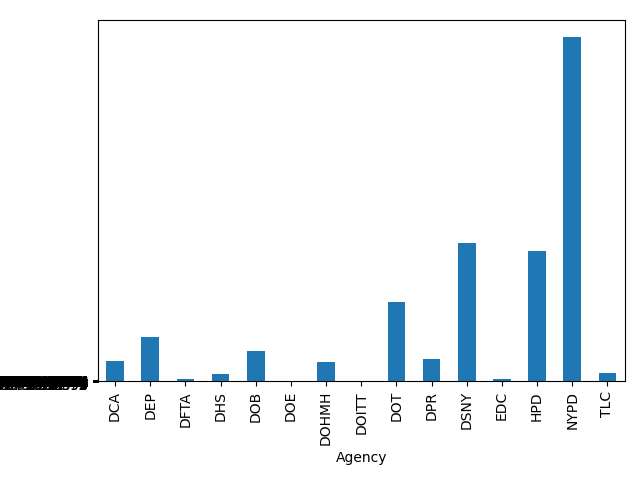

In [63]:
# Create bar chart based off group series
agency_chart = count_agency.plot(kind='bar')

# Set the x and y labels
agency_chart.set_xlabel("Agency")
agency_chart.set_ylabel("Number of Requests")

plt.tight_layout()
plt.show
plt.savefig("Image_Files/agency_chart.png")

In [67]:
# Set new index to last_name
complaint_df = clean_first_df.set_index("complaint_type")
complaint_df.head()

,created_date,closed_date,agency,agency_name,location_type,incident_zip,incident_address,street_name,address_type,city,status,borough,open_data_channel_type,latitude,longitude
complaint_type,,,,,,,,,,,,,,,
Food Poisoning,2020-01-01,2020-01-02 09:51:29,DOHMH,Department of Health and Mental Hygiene,Restaurant/Bar/Deli/Bakery,10455,748 EAST 149 STREET,EAST 149 STREET,ADDRESS,BRONX,Closed,BRONX,ONLINE,40.812996,-73.907973
Food Poisoning,2020-01-01,2020-01-02 00:00:01,DOHMH,Department of Health and Mental Hygiene,Restaurant/Bar/Deli/Bakery,10458,2701 DECATUR AVENUE,DECATUR AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,40.864866,-73.888783
Food Poisoning,2020-01-01,2020-01-10 00:00:01,DOHMH,Department of Health and Mental Hygiene,Restaurant/Bar/Deli/Bakery,11229,3442 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.600129,-73.941843
Food Poisoning,2020-01-01,2020-01-02 09:50:09,DOHMH,Department of Health and Mental Hygiene,Other (Explain Below),11203,5707 CHURCH AVENUE,CHURCH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.652536,-73.923540
Food Poisoning,2020-01-01,2020-01-15 00:00:01,DOHMH,Department of Health and Mental Hygiene,Other (Explain Below),11215,625 UNION STREET,UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,40.677963,-73.984436
